# Problem Formulation:

**These is a classification problem** to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events. </br>
**The input** for our problem is the various features that descripe all information abou people profile.</br>
**The output** of the problem is a probability that indicates whether two people are likely to be a match or not.</br>
**The goal** is to improve the matching of participants in speed dating events.


The required function is to **classify** if the people is matching or not

**The challenges** is the dealing with noisy data, missing values, and irrelevant or unnecessary features.</br>
Also, the features included in the dataset may not be sufficient to accurately predict the product rating, which may require additional data sources or feature engineering


**The benefit of of a speed dating session** Improve matching by predicting the outcome of a speed dating session, we can identify which pairs of people are more likely to be a good match. This can help organizers of speed dating events to better match people and increase the likelihood of successful matches.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score,f1_score
from collections import Counter

from sklearn import preprocessing


In [ ]:
# pip install scikit-plot

In [ ]:
import sys
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import scikitplot as skplt

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


## Upload Data

In [ ]:
train_data = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a2/train.csv")
test_data = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a2/test.csv")

train_data.head(5)

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


## Exploar Data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [ ]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the train_data.info() output )
features_numeric = list(train_data.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the train_data.info() output )
features_categorical = list(train_data.select_dtypes(include=['object']))

print('categorical features:', features_categorical)
# print('numeric features:', features_numeric)


categorical features: ['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income', 'career']


In [ ]:
train_data[['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income', 'career']].head() 

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided


From above we can see that most of columns are Float/Int but there are 8 columns have datatype Object,So we will need to convert datatype for some  columns like (mn_sat, tuition,zipcode, income) to float.

**Describe Data**</br>
We need to view more information about our dataset using statistics to get clear view about it. 

In [ ]:
train_data.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


### Check Nulls 

In [ ]:
train_data.isna().sum().sort_values(ascending = False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
shar7_2     4505
fun7_2      4498
intel7_2    4498
attr7_2     4498
attr7_3     4496
sinc7_3     4496
intel7_3    4496
fun7_3      4496
amb7_3      4496
shar7_3     4496
shar2_3     4496
attr5_3     4496
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
shar4_3     3838
fun4_3      3838
intel4_3    3838
sinc4_3     3838
attr4_3     3838
attr2_3     3838
sinc2_3     3838
intel2_3    3838
fun2_3      3838
amb2_3      3838
amb4_3      3838
mn_sat      3674
tuition     3365
attr1_3     3105
intel1_3    3105
amb3_3      3105
sinc3_3     3105
intel3_3    3105
shar1_3     3105
amb1_3      3105
fun1_3      3105
fun3_3      3105
attr3_3     3105
sinc1_3     3105
date_3      3105
you_call    3105
them_cal    3105
amb3_s      3069
sinc3_s     3069
intel3_s    3069
fun3_s      3069
attr3_s     3069
shar1_s     2994
amb1_s      2994
fun1_s      2994
intel1_s    2994
sinc1_s     2994
attr1_s     29

Based on the observations, it is evident that the dataset contains a considerable amount of missing values. To address this issue, we can drop certain columns that have a high number of null values. Additionally, we can attempt to fill the missing values in other columns to salvage as much data as possible.

### Check Duplication

In [ ]:
print("Duplicated data:", train_data.duplicated().sum())

Duplicated data: 0


The dataset does not contain any duplicate values across all the variables.

### Check if data imbalanced 

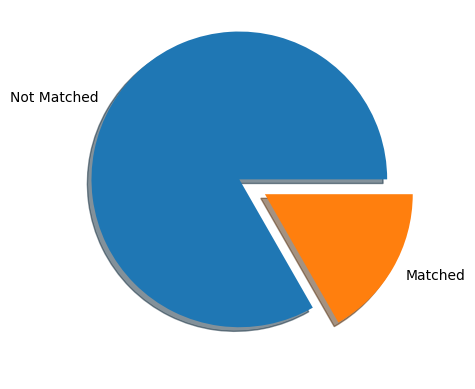

In [ ]:
# summarize class distribution
myexplode = [0.2, 0]
counter = Counter(train_data['match'])
Labels = ['Not Matched','Matched']
plt.pie(counter.values(),labels = Labels , explode = myexplode, shadow = True)
plt.show()

It is evident that the dataset is imbalanced, which can negatively impact the performance of our machine learning model. To address this issue, we can oversample the examples in the minority class using various techniques. We will experiment with different methods to find the most effective approach.

### Show Distribution Of Data 

In [ ]:
# sns.pairplot(data=train_data,hue='match')

### Show Corrolation Between Features And Target Column

In [ ]:
# # calculate the correlation matrix
# corr = train_data.corr()
# fig, ax = plt.subplots(figsize=(20,20)) 
# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns
#            , annot=True)

In [ ]:
corrM = train_data.corr()
corrM

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
gender,1.000000,0.032132,-0.000875,-0.004192,0.017755,-0.004047,0.000410,0.009850,0.010318,-0.056275,...,-0.169387,0.011476,-0.153701,-0.066626,-0.133302,-0.277085,0.080227,-0.065562,0.069091,0.006340
idg,0.032132,1.000000,0.330587,0.093823,0.391918,0.164705,0.174651,0.161976,0.139034,0.088372,...,-0.050350,-0.060674,-0.041080,-0.005502,0.001764,-0.018915,-0.093206,-0.061079,-0.145645,-0.036693
condtn,-0.000875,0.330587,1.000000,0.219735,0.820898,0.331013,0.306722,0.331402,0.322467,0.218009,...,0.044158,0.061796,0.069298,0.027447,0.077571,-0.087502,0.051449,0.106486,0.123314,-0.044675
wave,-0.004192,0.093823,0.219735,1.000000,0.228917,0.079820,0.061166,0.093478,0.087904,0.996714,...,0.036948,-0.104562,0.053971,0.000520,0.092556,-0.001751,0.014611,0.088716,0.047841,-0.001863
round,0.017755,0.391918,0.820898,0.228917,1.000000,0.380632,0.368352,0.397952,0.390320,0.218901,...,0.036600,0.022696,0.059530,0.013107,0.034647,-0.035242,-0.012896,0.104829,0.092951,-0.029700
position,-0.004047,0.164705,0.331013,0.079820,0.380632,1.000000,0.725619,0.156510,0.164090,0.076666,...,0.041865,0.066377,0.043142,0.054227,0.066300,0.111991,0.089283,0.135484,0.058825,-0.026828
positin1,0.000410,0.174651,0.306722,0.061166,0.368352,0.725619,1.000000,0.154697,0.152826,0.057726,...,-0.031083,0.040163,0.073800,-0.024003,0.201598,0.125594,0.106791,0.232412,0.030543,-0.011816
order,0.009850,0.161976,0.331402,0.093478,0.397952,0.156510,0.154697,1.000000,0.158508,0.089130,...,0.000877,0.002350,0.006350,0.002645,0.018610,-0.035897,-0.004632,0.016419,0.029174,-0.016321
partner,0.010318,0.139034,0.322467,0.087904,0.390320,0.164090,0.152826,0.158508,1.000000,0.112771,...,0.016141,0.012612,0.021345,-0.000157,0.002868,-0.002601,0.003345,0.031795,0.050511,0.006595
pid,-0.056275,0.088372,0.218009,0.996714,0.218901,0.076666,0.057726,0.089130,0.112771,1.000000,...,0.040356,-0.113803,0.056667,-0.001845,0.108400,0.021372,0.009585,0.096788,0.043115,-0.002027


In [ ]:
corrM.sort_values(by=['match'], ascending=False)['match']

match       1.000000
like_o      0.309646
like        0.303105
fun         0.273294
fun_o       0.272843
attr        0.269583
shar        0.265907
shar_o      0.263044
attr_o      0.261901
prob        0.259563
prob_o      0.249655
them_cal    0.220125
num_in_3    0.218522
intel_o     0.177166
intel       0.174643
sinc        0.171329
sinc_o      0.162143
amb_o       0.144842
amb         0.144386
date_3      0.140299
match_es    0.135905
expnum      0.128741
numdat_3    0.112133
you_call    0.097424
fun7_2      0.084025
intel2_3    0.068444
satis_2     0.059951
fun3_2      0.057146
fun1_2      0.052199
fun1_s      0.048188
intel2_2    0.047783
attr1_s     0.046976
fun3_1      0.046222
fun7_3      0.044944
clubbing    0.043935
attr5_3     0.042603
fun1_3      0.041720
met         0.040648
yoga        0.040470
dining      0.039973
attr3_1     0.039295
intel1_s    0.039283
fun3_s      0.038288
reading     0.038097
fun1_1      0.037434
fun4_2      0.037005
length      0.035683
pf_o_fun    0

# Pre-Processing The Data

In [ ]:
trainData = train_data.copy()

## Change Data types

In [ ]:
trainData[['mn_sat', 'tuition','zipcode', 'income']] = train_data[['mn_sat', 'tuition','zipcode', 'income']].replace(",", "", regex=True)
#For Testing data
test_data[['mn_sat', 'tuition','zipcode', 'income']] = train_data[['mn_sat', 'tuition','zipcode', 'income']].replace(",", "", regex=True)
trainData[['mn_sat', 'tuition','zipcode', 'income']].head()

,mn_sat,tuition,zipcode,income
0,1290.00,21645.00,NaN,NaN
1,NaN,NaN,2021,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,10471,45300.00
4,1400.00,26019.00,66208,46138.00


In the above cells we convert the datatype of four columns (mn_sat, tuition,zipcode,income) into float 

In [ ]:
trainData[['mn_sat', 'tuition','zipcode', 'income']] = trainData[['mn_sat', 'tuition','zipcode', 'income']].astype(float)
#For testing data
test_data[['mn_sat', 'tuition','zipcode', 'income']] = test_data[['mn_sat', 'tuition','zipcode', 'income']].astype(float)
trainData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(177), int64(11), object(4)
memory usage: 8.7+ MB


Now we need to display the categorical feature(s).

In [ ]:
# categorical features can be selected by: (based on the train_data.info() output )
features_categorical = list(trainData.select_dtypes(include=['object']))

print('categorical features:', features_categorical)

categorical features: ['field', 'undergra', 'from', 'career']


In [ ]:
print("The count of filed types:", trainData['field'].value_counts().count())
print("The count of school for undegraduates:", trainData['undergra'].value_counts().count())
print("The count of places:", trainData['from'].value_counts().count())
print("The count of career paths:", trainData['career'].value_counts().count())


The count of filed types: 259
The count of school for undegraduates: 241
The count of places: 269
The count of career paths: 367


In [ ]:
# categorical encoding for training data
trainData[features_categorical] = trainData[features_categorical].astype("category")
# categorical encoding for testing data 
test_data[features_categorical] = test_data[features_categorical].astype("category")

There 4 categorical columns (field, undergra, from, career) we will need to encode those columns before starting with the model.

## Encode Categorical Data

In [ ]:
#Encode field column
trainData.drop(columns=['field'],inplace = True)
label_encoder = preprocessing.LabelEncoder().fit(train_data['field'])
labels = label_encoder.transform(train_data['field'])
trainData['field'] = labels


#Encode undergra column
trainData.drop(columns=['undergra'],inplace = True)
label_encoder = preprocessing.LabelEncoder().fit(train_data['undergra'])
labels = label_encoder.transform(train_data['undergra'])
trainData['undergra'] = labels

#Encode from column
trainData.drop(columns=['from'],inplace = True)
label_encoder = preprocessing.LabelEncoder().fit(train_data['from'])
labels = label_encoder.transform(train_data[ 'from'])
trainData['from'] = labels

#Encode career column
trainData.drop(columns=['career'],inplace = True)
label_encoder = preprocessing.LabelEncoder().fit(train_data['career'])
labels = label_encoder.transform(train_data['career'])
trainData['career'] = labels

We attempted to encode the four categorical features before training the model. However, we observed that the accuracy of the model decreased when tested on the test dataset.

## Drop Unwanted nulls

Certain features in the dataset have low significance, and therefore, we will remove them before training the model.

In [ ]:
unwantedData = ['undergra' ,'from' ,'career','mn_sat', 'tuition','zipcode']
trainData.drop(columns = unwantedData,inplace = True)
#For Test Data
test_data.drop(columns = unwantedData,inplace = True)

## Solve Nulls  

We need to drope Columns with high percentage of nulls (more than 65%) 

In [ ]:
null_count = trainData.isna().sum().sort_values(ascending = False)
total_count = trainData.shape[0]
null_percentage = (null_count / total_count)*100
Droped_columns = pd.DataFrame(null_percentage[null_percentage >=65]).index
print("Columns with high percentage of null values \n\n",Droped_columns)

Columns with high percentage of null values 

 Index(['num_in_3', 'numdat_3', 'expnum', 'sinc7_2', 'amb7_2', 'shar7_2',
       'attr7_2', 'intel7_2', 'fun7_2', 'shar7_3', 'attr7_3', 'sinc7_3',
       'intel7_3', 'fun7_3', 'amb7_3', 'shar2_3', 'fun5_3', 'amb5_3',
       'attr5_3', 'sinc5_3', 'intel5_3'],
      dtype='object')


In [ ]:
trainData.drop(columns = Droped_columns, inplace=True)
#For Testing Data
test_data.drop(columns = Droped_columns, inplace=True)

In [ ]:
trainData.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc2_3,intel2_3,fun2_3,amb2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,6.0,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


After drop columns with high percentage of null values we need to solve the missing values in the rest column we will try different ways for that

### Simple Imputer

**SimpleImputer is a machine learning technique used for imputing missing values in a dataset. Here are some benefits of using SimpleImputer:**</br></br>

**Retains the structure of the data:** SimpleImputer replaces missing values with estimated values based on the mean, median or most frequent value of the respective feature. This means that the imputed values are likely to retain the structure and characteristics of the original data.</br>

**No loss of information:** SimpleImputer imputes missing values by using information from other data points in the same feature. This means that there is no loss of information in the imputation process, as all available information is used to estimate the missing values.</br>

**Handles both continuous and categorical data:** SimpleImputer can handle both continuous and categorical data, which makes it versatile and useful for a wide range of datasets.</br>

**Easy to use:** SimpleImputer is easy to use and implement, as it is available in many machine learning libraries and frameworks such as scikit-learn. It can be used as a drop-in replacement for other imputation techniques such as KNNImputer or IterativeImputer.</br>

**Can be tuned for optimal performance:** SimpleImputer allows the user to specify the strategy for imputing missing values, such as mean, median, most frequent or constant value. This parameter can be tuned for optimal performance on a given dataset.</br>

**Can improve model performance:** Imputing missing values using SimpleImputer can improve the performance of machine learning models that are trained on the dataset. This is because missing values can negatively impact the accuracy and generalizability of machine learning models.

**Overall,** SimpleImputer is a useful technique for imputing missing values in a dataset. Its ability to retain the structure of the data, handle both continuous and categorical data, and improve model performance makes it a popular choice for many machine learning tasks.</br>

**First,We will try to fill nulls using mean value**

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
# Fitting the data to the imputer object
imputer = imputer.fit(trainData)
 
# Imputing the data    
trainData = imputer.transform(trainData)

In [ ]:
# trainData.isna().sum().sum()

### KNN Imputer

**KNNImputer is a machine learning technique used for imputing missing values in a dataset. Here are some benefits of using KNNImputer:**</br></br>

1. **Retains the structure of the data:** KNNImputer replaces missing  alues with estimated values that are based on the values of other similar data points. This means that the imputed values are likely to retain the structure and characteristics of the original data.</br>

2. **No loss of information:** KNNImputer imputes missing values by using information from other data points in the same dataset. This means that there is no loss of information in the imputation process, as all available information is used to estimate the missing values.</br>

3. **Handles both continuous and categorical data:** KNNImputer can handle both continuous and categorical data, which makes it versatile and useful for a wide range of datasets.</br>

4. **Easy to use:** KNNImputer is easy to use and implement, as it is available in many machine learning libraries and frameworks such as scikit-learn. It can be used as a drop-in replacement for other imputation techniques such as mean imputation and median imputation.</br>

5. **Can be tuned for optimal performance:** KNNImputer allows the user to specify the number of nearest neighbors to consider when imputing missing values. This parameter can be tuned for optimal performance on a given dataset.</br>

6. **Can improve model performance:** Imputing missing values using KNNImputer can improve the performance of machine learning models that are trained on the dataset. This is because missing values can negatively impact the accuracy and generalizability of machine learning models.</br>

**Overall,** KNNImputer is a useful technique for imputing missing values in a dataset. Its ability to retain the structure of the data, handle both continuous and categorical data, and improve model performance makes it a popular choice for many machine learning tasks.

In [ ]:

# use KNN model to predict missing value (works for both numeric & categorical)
from sklearn.impute import KNNImputer

# replace with constant
imputer = KNNImputer(n_neighbors=10) 


# here select only categorical features
train_features = imputer.fit_transform(
    df_converted_train)


test_features = imputer.transform(
    df_converted_test)

## Handle Imbalancing In Dataset

Handling imbalanced datasets is important because it can negatively impact the performance of machine learning models. In an imbalanced dataset, one class (the minority class) may have significantly fewer examples than another class (the majority class). This can cause the machine learning model to be biased towards the majority class and perform poorly on the minority class.

In these step we will try to solve imbalancing in the dataset by using over sampling method, which will add random samples for low  

**SMOTE (Synthetic Minority Over-sampling Technique) is a machine learning technique used for handling imbalanced data. Here are some benefits of using SMOTE:**</br></br>

2. **Improves model performance:** Imbalanced data can negatively impact the performance of machine learning models, as the model may be biased towards the majority class. SMOTE can be used to generate synthetic samples of the minority class, which can improve the performance of the model.</br>

3. **Retains the structure of the data:** SMOTE generates synthetic samples of the minority class by interpolating between existing samples. This means that the synthetic samples are likely to retain the structure and characteristics of the original data.</br>

4. **Easy to use:** SMOTE is easy to use and can be implemented using many machine learning libraries and frameworks such as scikit-learn. It can be used as a drop-in replacement for other techniques such as random oversampling or undersampling.</br>

5. **Versatile:** SMOTE can be used for a wide range of classification problems, including binary and multi-class classification.

6. **Can be tuned for optimal performance:** SMOTE allows the user to specify the number of synthetic samples to generate and the distance metric used for interpolation. These parameters can be tuned for optimal performance on a given dataset.</br>

7. **Reduces the risk of overfitting:** SMOTE generates synthetic samples that are similar to the minority class, which can reduce the risk of overfitting that can occur when using oversampling techniques that simply replicate existing samples.</br>


In [ ]:
X_train = trainData.copy()
X_train .drop(['match'],axis='columns', inplace=True)
y_train = trainData['match']

In [ ]:
from imblearn.over_sampling import SMOTE
# # transform the dataset
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X, y)
# # summarize the new class distribution

## Train Test Splite

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23 , stratify=y) #, stratify=y

In [ ]:
# fig, ax = plt.subplots(figsize=(15,7)) 
# sns.heatmap(data=train_data.isna(),yticklabels=False,cbar=False)

# A Tunable Pipeline

In fact, any preprocessing steps can be considered as part of model and different configurations for these steps can be tunable. We can combine preprocessing steps and model as a single tunable pipeline with hyper-parameters.

**Why we use pipeline?**  </br></br>
The various stages in the machine learning process can be organised and automated conveniently using pipelines. In managing the process, this can save time and effort.</br>

By streamlining the process and lowering the possibility of mistakes or inconsistencies, pipelines can enhance the performance of machine learning models.</br>

By encapsulating the entire process in a single object, pipelines can facilitate the deployment of machine learning models in real-world settings.



In [ ]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(X_train.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(X_train.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sin

In [ ]:
# # df = pd.DataFrame(X_train)
# features_categorical = list(X_train.select_dtypes(include=['category']))
# print(features_categorical)
# for i in features_categorical:
#     X_train.drop(columns=[i],inplace = True)
#     print(X_train.head())
#     label_encoder = preprocessing.LabelEncoder().fit(train_data[i])
#     labels = label_encoder.transform(X_train[i])
#     X_train[i] = labels
# #     print(df[i].head())

In [ ]:
def encoding_func(df):
    df = pd.DataFrame(df)
    features_categorical = list(df.select_dtypes(include=['category']))
    print(features_categorical)
    for i in features_categorical:
        df.drop(columns=[i],inplace = True)
        label_encoder = preprocessing.LabelEncoder().fit(train_data[i])
        labels = label_encoder.transform(df[i])
        df[i] = labels
    return df

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(encoding_func)

In this case, we attempted to develop a function that can encode categorical features to use it in the pipeline 

In [ ]:
# df5 = encoding_func(X_train)
# df5[['field', 'undergra', 'from', 'career']].head()

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant'))
        ,('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ('encoding', transformer)
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
#         
    ]
)
# PReProcessingStage = Pipeline(
#     steps=[ ('Transformers', preprocessor),
#         ('smote', SMOTE(random_state=11))])
           
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
#         ('smote', SMOTE()),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

## Grid Search with Cross-validation

We can tune the hyperparameters (including different preprocessing configurations using cross-validation and grid-search).</br></br>


**Grid search**</br></br>
The grid search is the most common hyperparameter tuning approach given its simple and straightforward procedure. It is an uninformed search method, which means that it does not learn from its previous iterations.</br>

Using this method entails testing every unique combination of hyperparameters in the search space to determine the combination that yields the best performance.</br>

It’s easy to see the benefits of such a brute-force method; what better way to find the best solution than to try all of them out?</br>

Unfortunately, this approach does not scale well; an increase in the size of the hyperparameter search space will result in an exponential rise in run time and computation.

In [ ]:

# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['most_frequent'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [50,55,60,70,80,90],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[4,5,6,10, 20, 30]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
RandomForestGS = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2, 
    scoring='roc_auc')

RandomForestGS.fit(X_train, y_train)

print('best score {}'.format(RandomForestGS.best_score_))
print('best score {}'.format(RandomForestGS.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
best score 0.8550619669409283
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 70, 'preprocessor__num__imputer__strategy': 'most_frequent'}


In [ ]:
# # the resulting model is the same pipeline with the best hyperparameters
# # trained on the full training set. we can use it directly
# grid_search.predict(X_test)

## Grid Search with validation set

Cross-validation is expensive. We can supply our own validation set

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, train_size = 0.8, stratify = y_train, random_state = 2022)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

RandomForestGS_with_Val = GridSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
RandomForestGS_with_Val.fit(X_train, y_train)

print('best score {}'.format(RandomForestGS_with_Val.best_score_))
print('best score {}'.format(RandomForestGS_with_Val.best_params_))

Fitting 1 folds for each of 36 candidates, totalling 36 fits
best score 0.8465344501929867
best score {'my_classifier__max_depth': 6, 'my_classifier__n_estimators': 70, 'preprocessor__num__imputer__strategy': 'most_frequent'}


The accuracy for these attempet is **86.662%**</br>
But we need to try more models to find the best model for our problem

## Random Search 

Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)</br>

**Random search**</br></br>
The random search is also an uninformed search method that treats iterations independently.</br>

However, instead of searching for all hyperparameter sets in the search space, it evaluates a specific number of hyperparameter sets at random. This number is determined by the user.</br>

Since it performs fewer trials in hyperparameter tuning, the method requires less computation and run time than the grid search.</br>

Unfortunately, since the random search tests hyperparameter sets at random, it runs the risk of missing the ideal set of hyperparameters and forgoing peak model performance.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

RandomForestRS = RandomizedSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

RandomForestRS.fit(X_train, y_train)

print('best score {}'.format(RandomForestRS.best_score_))
print('best score {}'.format(RandomForestRS.best_params_))

Fitting 1 folds for each of 20 candidates, totalling 20 fits
best score 0.8469861213763653
best score {'preprocessor__num__imputer__strategy': 'most_frequent', 'my_classifier__n_estimators': 60, 'my_classifier__max_depth': 10}


## Bayesian Search

We can interpret the hyperparameter search problem as a non-differentiable optimization problem, and use bayesian learning to predict what is the next hyperparamter values we should try given the current trials. 

The flowchart of the algorithm is roughly:

![Flowchart](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/images/19_flowchart_bayesian_optimization.png?raw=1)

[Image source: https://github.com/Hvass-Labs/TensorFlow-Tutorials]

In [ ]:
!pip install scikit-optimize

In [ ]:
# Let's try this with SVM model
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# define ranges for bayes search
RandomForestBS = BayesSearchCV(
    full_pipline, param_grid,
    # number of trials 
    n_iter=25,
    random_state=0,
    verbose=1,
    # we still use 
    cv=pds,
)

RandomForestBS.fit(X_train, y_train)

print('best score {}'.format(RandomForestBS.best_score_))
print('best score {}'.format(RandomForestBS.best_params_))


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8544839255499154
best score OrderedDict([('my_classifier__max_depth', 30), ('my_classifier__n_estimators', 60), ('preprocessor__num__imputer__strategy', 'most_frequent')])


The accuracy for these attempet is **85.515%**</br>
Which is less than the grid search and these is because the grid search is more powerfull as it try all solutions

## Support Vector Machine

In [ ]:
# Let's try this with SVM model
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
SVCbayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=0,
    verbose=1,
    # we still use 
    cv=pds,
)

SVCbayes_search.fit(X_train, y_train)

print('best score {}'.format(SVCbayes_search.best_score_))
print('best score {}'.format(SVCbayes_search.best_params_))


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8248730964467005
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


The training accuracy for these attempet is less than other attempets 

## XGBost

**There are several benefits of using XGBoost (Extreme Gradient Boosting) as a machine learning model:**</br></br>

1. **High performance:** XGBoost is known for its high performance and scalability. It uses a gradient boosting algorithm that combines multiple weak models to make accurate predictions. It is particularly effective in handling large datasets and high-dimensional feature spaces.</br>

2. **Flexibility:** XGBoost can be used for both classification and regression problems. It supports a wide range of objective functions, including binary logistic regression, multi-class classification, and ranking problems.</br>

3. **Regularization:** XGBoost provides several regularization techniques, such as L1 and L2 regularization, to prevent overfitting and improve generalization performance.</br>

4. **Feature importance:** XGBoost provides a feature importance score that tells us how important each feature is in making predictions. This can be useful in feature selection and feature engineering.</br>

5. **Interpretable:** XGBoost provides a detailed summary of the model's performance and feature importance, making it easier to interpret and understand the model.</br>

6. **Easy to use:** XGBoost is easy to implement and can be integrated with many machine learning libraries and frameworks, such as scikit-learn and TensorFlow.</br>


In [ ]:
# Define the search space for hyperparameters
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


full_piplineXGB = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', XGBClassifier(objective='binary:logistic'))
    ]
)

search_spaces = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'my_classifier__n_estimators': Integer(50, 200),
    'my_classifier__max_depth': Integer(2, 10),
    'my_classifier__min_child_weight': Integer(1, 10),
    'my_classifier__subsample': Real(0.5, 1.0, prior='uniform'),
    'my_classifier__gamma': Real(0, 1, prior='uniform'),
    'my_classifier__colsample_bytree': Real(0.5, 1.0, prior='uniform'),
    'my_classifier__reg_alpha': Real(1e-5, 1e-1, prior='log-uniform'),
    'my_classifier__reg_lambda': Real(1e-5, 1e-1, prior='log-uniform')
}


# Define the Bayesian search with cross-validation
bayes_search_cv = BayesSearchCV(
    full_piplineXGB,
    search_spaces,
    n_iter=50,
    cv=5,
    # n_jobs=-1,
    verbose=1
)

# Perform the search
bayes_search_cv.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters: ", bayes_search_cv.best_params_)
print("Best score: ", bayes_search_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The accuracy for these attempet is **88.44%**</br>
Which is the highest accuracy until now 

## Logistic Regression

In [ ]:
full_piplineLR = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', LogisticRegression())
    ]
)


param_gridLR = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__C': np.logspace(-4, 4, 50),
    'my_classifier__penalty' : ['l1', 'l2'],
    'my_classifier__solver': [ 'liblinear'],
}


LogisticRegressionGS = GridSearchCV(
    full_piplineLR, param_gridLR, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

LogisticRegressionGS.fit(X_train, y_train)

print('best score {}'.format(LogisticRegressionGS.best_score_))
print('best score {}'.format(LogisticRegressionGS.best_params_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

best score 0.865647905341255
best score {'my_classifier__C': 0.0062505519252739694, 'my_classifier__penalty': 'l2', 'my_classifier__solver': 'liblinear', 'preprocessor__num__imputer__strategy': 'mean'}


The testing accurase for these attempet is **85.761%**</br>
Which is less than the accurace of XGBoost the reason for that is:</br></br>
XGBoost uses a decision tree-based approach for classification, which can capture complex interactions and non-linear relationships between the features and the target variable. In contrast, Logistic Regression assumes a linear relationship between the features and the target variable, which may not be suitable for complex problems.

## XGBoost with KNN imputer



For these attempt, we will use:
1.  XGBoost with cross validation.
2. KNN Imputer to fill nulls 
3. Bayse search

In [ ]:
from sklearn.impute import KNNImputer

# # replace with constant
# imputer = KNNImputer(n_neighbors=10) 
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', KNNImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='constant'))
        ,('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ('encoding', transformer)
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
#         
    ]
)


In [ ]:
# Define the search space for hyperparameters
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


full_piplineXGB = Pipeline(
    steps=[
        ('preprocessor', preprocessor2),
        ('my_classifier', XGBClassifier(objective='binary:logistic'))
    ]
)

    'preprocessor__num__imputer__n_neighbors': [10,20,25],
    'my_classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'my_classifier__n_estimators': Integer(50, 200),
    'my_classifier__max_depth': Integer(2, 10),
    'my_classifier__min_child_weight': Integer(1, 10),
    'my_classifier__subsample': Real(0.5, 1.0, prior='uniform'),
    'my_classifier__gamma': Real(0, 1, prior='uniform'),
    'my_classifier__colsample_bytree': Real(0.5, 1.0, prior='uniform'),
    'my_classifier__reg_alpha': Real(1e-5, 1e-1, prior='log-uniform'),
    'my_classifier__reg_lambda': Real(1e-5, 1e-1, prior='log-uniform')
}


# Define the Bayesian search with cross-validation
bayes_search_cv = BayesSearchCV(
    full_piplineXGB,
    search_spaces,
    n_iter=50,
    cv=5,
    # n_jobs=-1,
    verbose=1
)

# Perform the search
bayes_search_cv.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters: ", bayes_search_cv.best_params_)
print("Best score: ", bayes_search_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

When we used KNN Imputer to fill nulls it dditn't improve the accurace for XGBoost model as the accurace on testing dataset is **88.672%**</br></br>
One Possible reason for that is KNN Imputer may not be able to effectively impute missing values when missing values are clustered or have a specific pattern, which leading to lower accuracy.

## Using test dataset

In [ ]:
submission = pd.DataFrame()

submission['id'] = test_data['id']

submission['match'] = bayes_search_cv.predict_proba(test_data)[:,1]

submission.to_csv('Xgboost_withBSV2.csv', index=False)

# Final Result

**In this notebook, we experimented with various models and different preprocessing techniques:**</br></br>
1. During the preprocessing stage, we utilized SimpleImputer to replace missing values in both categorical and numerical variables. We also employed one-hot encoding to encode categorical variables and utilized XGBoost as the machine learning model. The hyperparameters of the model were optimized using Bayesian search, which resulted in the highest accuracy of 88.672% on the test set.</br>

2. In the preprocessing stage, we employed SimpleImputer to replace missing values in both categorical and numerical variables. We also utilized one-hot encoding to encode categorical variables and used Random Forest as the machine learning model. The hyperparameters of the model were optimized using Grid search, which resulted in an accuracy of 86.744% on the test set.</br>

3. During the preprocessing stage, we utilized SimpleImputer to replace missing values in both categorical and numerical variables. We also employed one-hot encoding to encode categorical variables and employed Random Forest as the machine learning model. The hyperparameters of the model were optimized using Bayesian search, which resulted in an accuracy of 85.323% on the test set.</br>


4. During the preprocessing stage, we employed SimpleImputer to replace missing values in both categorical and numerical variables. We also utilized one-hot encoding to encode categorical variables and used Random Forest as the machine learning model. The hyperparameters of the model were optimized using Grid search, which resulted in an accuracy of 84.974% on the test set.</br>

5. In the preprocessing stage, we utilized SimpleImputer to fill null values for categorical features and KNNImputer for numerical features. We also used one-hot encoding to encode categorical features and XGBoost as the machine learning model. The hyperparameters of the model were tuned using Bayesian search, which resulted in the highest accuracy of 87.392% on the test set.


 **The highst accuracy** reached using:
 1. Xgboost model
 2. Bayes Search 
 3. Simple Imputer to fill nulls 
 
The finall accuracy on testing dataset is : **88.66**

# Discussion

**🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**</br></br>
There are two things that explain why Linear Regression is not suitable for classification.</br> **1.** The first one is that Linear Regression deals with continuous values whereas classification problems mandate discrete values.</br>
**2.** The second problem is regarding the shift in threshold value when new data points are added.</br>
**3.** It lacks non-linearity. Most real-world classification problems are non-linear. A simple linear model will not be able to capture these non-linear relationships correctly. Models like Perceptrons (with a step function) and Logisitc Regression (with a sigmoid) can induce non-linearity andMODEL more complex decision boundaries.</br>
**4.** It lacks probabilistic output (for Logistic Regression). Logistic Regression produces probabilistic outputs (values between 0-1) that can be directly interpreted as class probabilities. A simple linear regression model just produces an uncalibrated continuous value.</br></br>

**So in summary,** a classification model needs discrete class outputs, a way to threshold into classes, non-linearity, and potentially probabilistic outputs. A simple linear regression lacks all of these key aspects, hence it is not suitable for most classification problems

**🌈What's a decision tree and how it is different to a logistic regression model?**</br></br>
A decision tree and logistic regression are both popular classification models, but they differ in some key ways:</br>

**1.** **Non-linearity**. Decision trees can model complex non-linear relationships, while logistic regression assumes linearity. A decision tree can partition the feature space into irregular regions, using thresholds and splits.</br>

**2.** **Codes interaction terms**. A decision tree explicitly codes interaction terms between features by selecting features to split on at each node. Logistic regression requires adding manual interaction terms to model feature interactions.</br>

**3.** **Interpretability**. Decision trees tend to be more interpretable, as the rules are easy to understand and visualize. The logistic regression coefficients are harder for humans to interpret meaningfully.</br>

**4.** **Probabilistic output**. Logistic regression produces probabilistic class probabilities, while a decision tree provides a hard class prediction.</br>

**5.** **Training algorithm**. Decision tree learning uses recursive partitioning and Gini/Entropy impurity minimization. Logistic regression uses iterative maximum likelihood estimation.</br>

**6.** **Scales to large data.** Both models can handle large datasets, but decision trees may be slightly more scalable due to smaller memory requirements.</br>

**7.** **Robustness to outliers.** Decision trees tend to be more robust to outliers in the training data. Logisitc regression can be sensitive to outliers which influence the maximum likelihood estimates.


**🌈What's the difference between grid search and random search?**</br></br>
**In Grid Search**, we try every combination of a preset list of values of the hyper-parameters and choose the best combination based on the cross validation score.</br>

**Random search** tries random combinations of a range of values (we have to define the number iterations). It is good in testing a wide range of values and normally it reaches a very good combination very fast, but the problem that it doesn’t guarantee to give the best parameters combination.</br>

On the other hand, Grid search will give the best combination but it can take a lot of time.

**🌈What's the difference between bayesian search and random search?**</br></br>



Both Bayesian search and random search are hyperparameter optimization techniques used to find the best combination of hyperparameters for a machine learning model. However, they differ in their approach to exploring the hyperparameter space.</br>

**Random search** involves sampling hyperparameters randomly from a predefined search space. The idea is to explore a wide range of hyperparameters in the hopes of finding a good combination. Random search is simple to implement and can work well when the search space is small or when the impact of individual hyperparameters on the performance of the model is not well understood.</br>

**Bayesian search,** on the other hand, uses probabilistic models to predict the performance of different hyperparameter combinations based on the results of previous evaluations. It builds a probabilistic model of the objective function (e.g., accuracy or F1 score) and uses this model to guide the search. Bayesian search is more efficient than random search as it uses the results of previous evaluations to guide the search towards promising regions of the hyperparameter space. It is particularly useful when the search space is large and the relationship between hyperparameters and model performance is complex.</br>

**In summary,** while random search is simple and easy to implement, Bayesian search is more efficient and can be more effective at finding the best combination of hyperparameters, especially when the search space is large and complex.